In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

## I. Load the datasets

In [112]:
dataset = pd.read_csv('spotifyAnalysis-08022020.csv')
test = pd.read_csv('predictSpotifyAnalysis-08022020.csv')

## II. Data overview

The dataset is composed of songs from Spotify that are considered hit, e.g., the 50 most played by country of all countries (success = 1) and songs from all genres that are considered non-hit (success = 0).

*See more about the features [HERE](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)*

The test set is composed of songs from "Novidades da semana" on Spotify.



**Analysis:**
 * What are the five artists that have more songs considered hit?
 * What kind of music is most successful: positive (happy, cheerful, euphoric) or negative (sad, depressed, angry) music?



**Question:** Which songs in "Novidades da semana" can become hit?
 * Evaluate the characteristics of the songs that are part of the 50 most played by country of all countries and try to predict the probability of news song belonging to that list.

In [113]:
dataset.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,artist,track_name,popularity,success
0,0.677,0.1080,90.013,0.1360,0.269,0.000917,4,0.845,11,219048,-4.798,0.680,0,Jay Wheeler,La Curiosidad,90,1
1,0.779,0.3390,80.045,0.1920,0.181,0.000000,4,0.703,7,267750,-4.975,0.595,0,Nane,Gang În Sus,52,1
2,0.844,0.4480,126.931,0.0974,0.111,0.000000,4,0.612,1,198000,-6.376,0.537,0,кис-кис,молчи,56,1
3,0.503,0.1400,185.090,0.0310,0.670,0.000000,3,0.494,3,217014,-6.838,0.333,1,Justin Lo,命硬,53,1
4,0.682,0.0926,98.031,0.1580,0.175,0.000000,4,0.791,5,166851,-7.328,0.672,1,Aya Nakamura,Djadja (feat. Maluma) - Remix,89,1


In [114]:
dataset.shape

(2755, 17)

In [115]:
dataset.dtypes

energy              float64
liveness            float64
tempo               float64
speechiness         float64
acousticness        float64
instrumentalness    float64
time_signature        int64
danceability        float64
key                   int64
duration_ms           int64
loudness            float64
valence             float64
mode                  int64
artist               object
track_name           object
popularity            int64
success               int64
dtype: object

In [116]:
dataset.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,success
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000
mean,0.627565,0.193906,122.701912,0.100565,0.319088,0.036900,3.960799,0.653376,5.242468,215250.793466,-7.189768,0.526309,0.578947,56.861343,0.454083
std,0.192960,0.179644,28.722936,0.094520,0.280886,0.146130,0.301151,0.155689,3.598395,66377.017843,3.204799,0.227881,0.493818,18.282669,0.497978
min,0.014100,0.019900,57.312000,0.023400,0.000002,0.000000,1.000000,0.130000,0.000000,66958.000000,-26.459000,0.034900,0.000000,0.000000,0.000000
25%,0.503500,0.096350,99.929500,0.039350,0.068600,0.000000,4.000000,0.550000,2.000000,176114.000000,-8.700000,0.347000,0.000000,47.000000,0.000000
50%,0.643000,0.121000,121.982000,0.060000,0.239000,0.000002,4.000000,0.672000,5.000000,201033.000000,-6.645000,0.533000,1.000000,58.000000,0.000000
75%,0.767000,0.214000,141.103000,0.124000,0.530500,0.000357,4.000000,0.773000,8.000000,235698.500000,-5.096000,0.704000,1.000000,69.000000,1.000000
max,0.995000,0.987000,216.334000,0.768000,0.991000,0.966000,5.000000,0.974000,11.000000,729760.000000,1.509000,0.977000,1.000000,100.000000,1.000000


## III. Data Cleaning

**a) Null values**

In [117]:
dataset.isnull().sum()

energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
time_signature      0
danceability        0
key                 0
duration_ms         0
loudness            0
valence             0
mode                0
artist              0
track_name          0
popularity          0
success             0
dtype: int64

**b) Data Rescaling**

Rescaling tempo, key, duration_ms, loudness and popularity features.

In [118]:
scaler = MinMaxScaler() 

scaled_values = scaler.fit_transform(dataset[['tempo', 'key', 'duration_ms','loudness', 'popularity']]) 
dataset[['tempo', 'key', 'duration_ms','loudness', 'popularity']] = scaled_values

scaled_values = scaler.fit_transform(test[['tempo', 'key', 'duration_ms','loudness', 'popularity']]) 
test[['tempo', 'key', 'duration_ms','loudness', 'popularity']] = scaled_values

dataset.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,success
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000
mean,0.627565,0.193906,0.411200,0.100565,0.319088,0.036900,3.960799,0.653376,0.476588,0.223736,0.688974,0.526309,0.578947,0.568613,0.454083
std,0.192960,0.179644,0.180622,0.094520,0.280886,0.146130,0.301151,0.155689,0.327127,0.100146,0.114588,0.227881,0.493818,0.182827,0.497978
min,0.014100,0.019900,0.000000,0.023400,0.000002,0.000000,1.000000,0.130000,0.000000,0.000000,0.000000,0.034900,0.000000,0.000000,0.000000
25%,0.503500,0.096350,0.267998,0.039350,0.068600,0.000000,4.000000,0.550000,0.181818,0.164689,0.634976,0.347000,0.000000,0.470000,0.000000
50%,0.643000,0.121000,0.406673,0.060000,0.239000,0.000002,4.000000,0.672000,0.454545,0.202285,0.708453,0.533000,1.000000,0.580000,0.000000
75%,0.767000,0.214000,0.526915,0.124000,0.530500,0.000357,4.000000,0.773000,0.727273,0.254587,0.763837,0.704000,1.000000,0.690000,1.000000
max,0.995000,0.987000,1.000000,0.768000,0.991000,0.966000,5.000000,0.974000,1.000000,1.000000,1.000000,0.977000,1.000000,1.000000,1.000000


## IV. Exploratory Data Analysis


**a) Correlation**

Correlation is a statistical technique to measure how variables are related.

 * **Positive correlation:** Indicates that the two variables move together.
 * **Negative correlation:** Indicates that the two variables move in opposite directions.

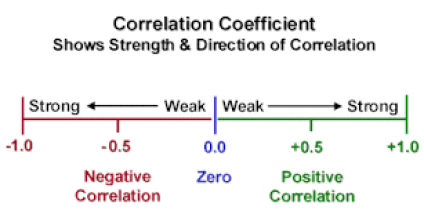

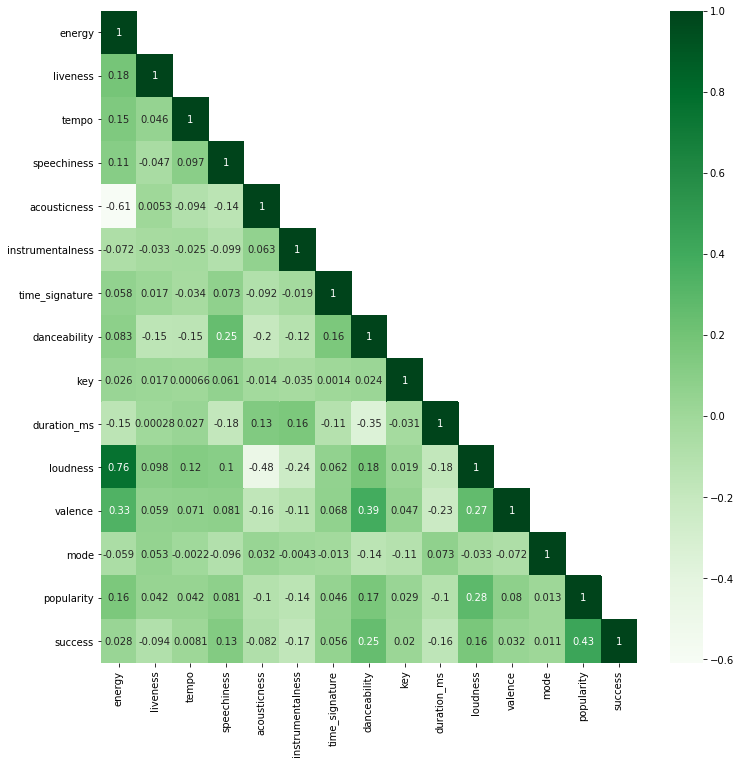

In [119]:
plt.figure(figsize=(12,12))

corr = dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(corr, mask=mask, annot=True, cmap="Greens")

The variables with stronger correlation are **loudness** x **energy** and **acousticness** x **energy**

**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [120]:
def plot_dist_reg (n_rows, n_elem, axis, features, colors, titles):
    fig, (axis) = plt.subplots(n_rows, n_elem, figsize=(15, 5))   
    itens = len(axis)
    i = 0
    while i < itens:
        axis[i] = sns.regplot(x = dataset[features[i][0]], y = dataset[features[i][1]], data=dataset, color=colors[i], line_kws={'color':'black'}, ax=axis[i])
        axis[i].set_title(titles[i])
        i+=1
    plt.subplots_adjust(wspace=0.5)
    plt.show()

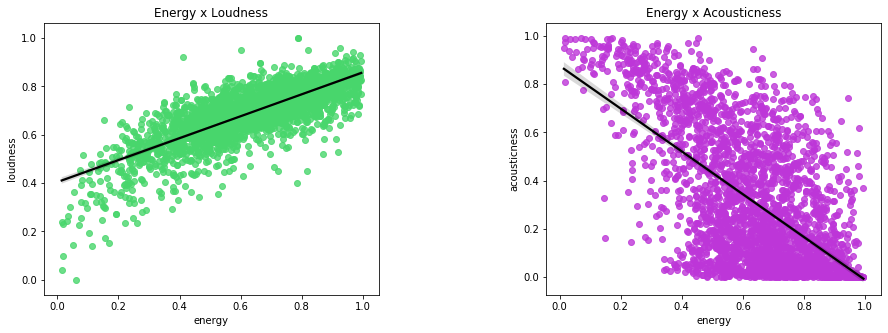

In [121]:
# Features with high positive correlation: energy and loudness
# Features with high negative correlation: energy and acousticness
axis = ['ax0','ax1']
features = [['energy','loudness'],['energy','acousticness']]
colors = ['#48d66c', '#bd36d8']
titles = ['Energy x Loudness', 'Energy x Acousticness']
plot_dist_reg(1, 2, axis, features, colors, titles)

 * Tracks with higher energy tend to have higher volume in decibels (loudness)
 * Tracks with less energy tend to be an acoustic song.

**b) Visualization analysis: Class**

In [122]:
def show_values_on_bars(ax, h_v, space):
    if h_v == "v":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = int(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    elif h_v == "h":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left")

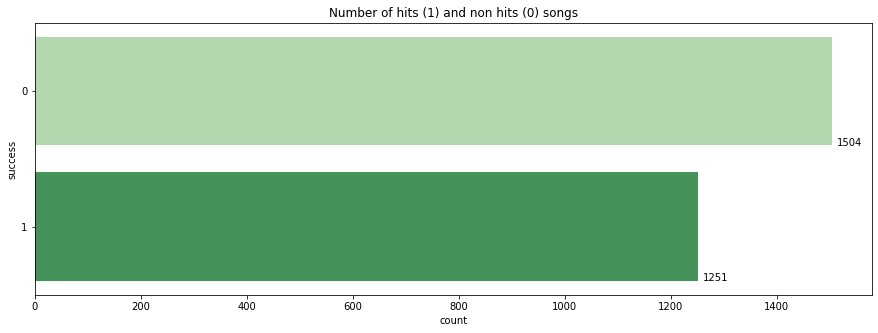

In [123]:
# Class analysis
plt.figure(1 , figsize = (15 , 5))
ax = sns.countplot(y = 'success', data = dataset, palette="Greens")
ax.set_title('Number of hits (1) and non hits (0) songs')
show_values_on_bars(ax, "h", 10)
plt.show()

**c) Visualization analysis: Hit songs**

In [124]:
# Get only hit songs
hits_df = dataset[dataset['success'] == 1]

 * What are the five artists that have more songs considered hit?

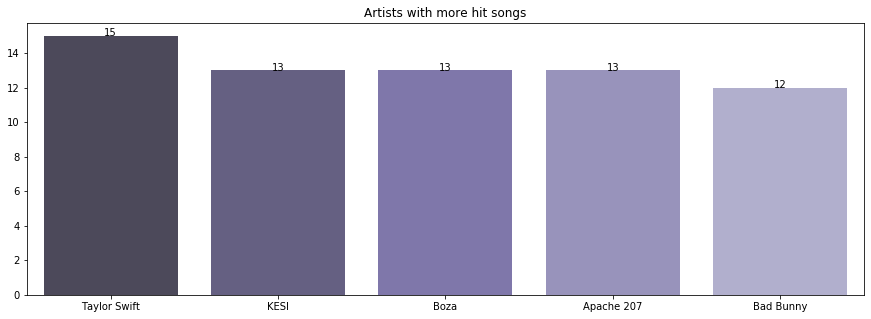

In [125]:
top_artists = hits_df['artist'].value_counts()[:5]
name = top_artists.index.tolist()
amount = top_artists.values.tolist()

plt.figure(1 , figsize = (15, 5))
ax = sns.barplot(x = name, y = amount, palette="Purples_d")
ax.set_title('Artists with more hit songs')
show_values_on_bars(ax, "v", 10)
plt.show()

 * What kind of music is most successful: positive or negative music?

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [126]:
valence = hits_df['valence'].value_counts()
valence_value = valence.index.tolist()
amount = valence.values.tolist()
i, high, low = 0, 0, 0

for v in valence_value:
    if (float(v) >= 0.5):
        high += amount[i]
    else:
        low += amount[i]
    i += 1

print('Positive tracks: ', high)
print('Negative tracks: ', low)

Positive tracks:  704
Negative tracks:  547


It can be concluded that most hit songs are positive (happy, cheerful, euphoric).

## V. Machine Learning Modeling and Evaluation

In [127]:
# Split features and class data and drop irrelevant columns
X = dataset.drop(['success', 'artist', 'track_name'], axis=1).values
y = dataset[['success']].values

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## a) Random Forest

Algorithm:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

[Reference](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

In [128]:
# Create the classifier object
rf_model = RandomForestClassifier(n_estimators = 100)

# Train
rf_model.fit(X_train, y_train.ravel())

# Predict
y_pred = rf_model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7315598548972189


## b) Logistic Regression

Logistic regression is a statistical method for predicting binary classes.
<br>It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

[Reference](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)

In [129]:
# Create the classifier object
lg_model = LogisticRegression()

# Train
lg_model.fit(X_train, y_train.ravel())

# Predict
y_pred = lg_model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6952841596130592


## c) SVM

The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset.

Algorithm:

1. Generate hyperplanes which segregates the classes in the best way.
2. Select the right hyperplane with the maximum segregation from the either nearest data points.

[Reference](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

In [130]:
# Create the classifier object
svm_model = svm.SVC(kernel='linear')

# Train
svm_model.fit(X_train, y_train.ravel())

# Predict
y_pred = svm_model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6977025392986699


## VI. Evaluation

The accuracy of the 3 modeling methods are:

 * Random Forest : 0.736 
 * Logistic Regression: 0.695
 * SVM: 0.697

As a result, the Random Forest model will be applied to predict the songs from "Novidades da semana" on Spotify.

In [131]:
# Drop irrelevant columns
df_test = test.drop(['artist', 'track_name'], axis=1).values

# Predict
test_predict = rf_model.predict(df_test)

# Get only predict hit songs
hits_predict = (test_predict == 1).sum()
print(hits_predict, "out of", len(test_predict), "was predicted as HIT")

13 out of 60 was predicted as HIT


In [132]:
df = pd.DataFrame({'Song': test['track_name'], 'Artist': test['artist'], 'Predict': test_predict})
df.sort_values(by=['Predict'], inplace=True, ascending=False)
df

,Song,Artist,Predict
59,Clap - From Road To Fast 9 Mixtape,Don Toliver,1
52,Cuidado Que Eu Te Supero,Yasmin Santos,1
37,my future,Billie Eilish,1
38,My Oasis (feat. Burna Boy),Sam Smith,1
25,I Should Probably Go To Bed,Dan + Shay,1
42,Who's Laughing Now,Ava Max,1
18,WHAT YOU GONNA DO???,Bastille,1
46,TOMA,Luísa Sonza,1
50,Lei Áurea,Borges,1
32,The Usual,Sam Fischer,1
